In [2]:
# importing the libraries.. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks",color_codes=True)

In [4]:
df=pd.read_csv(r"C:\Users\minds\Desktop\train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables to the pd.crosstab() function instead of one:



In [8]:
#Number of survived male and female with Pclass
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"],
                             margins=True)

In [9]:
survived_class


Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [27]:
# rename the column into classes

In [28]:
survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
columntotal,216,184,491,891


In [31]:
# rename the index  

In [32]:
survived_class.index= ["died","survived","columntotal"]
survived_class


,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
columntotal,216,184,491,891


Notice that by passing a second variable to the columns argument, the resulting table has columns categorized by both Pclass and Sex. The outermost index (Pclass) returns sections of the table instead of individual columns:

In [13]:
surv_sex_class = pd.crosstab(index=df["Survived"], 
                             columns=[df["Pclass"],
                                      df["Sex"]],
                             margins=True)
surv_sex_class

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [33]:
#rename the index
surv_sex_class.index= ["died","survived","columntotal"]
surv_sex_class

Pclass           1           2           3       All
Sex         female male female male female male     
died             3   77      6   91     72  300  549
survived        91   45     70   17     72   47  342
columntotal     94  122     76  108    144  347  891

In [15]:
#Number of survived male and female with Probabilities
survived_sex_class_norm = pd.crosstab(index=df["Survived"], 
                            columns=df["Sex"],
                           normalize=True,  margins=True) 
survived_sex_class_norm

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


# plotting a graph

#	2. Plot the count distribution (Bernoulli) of survival  (sns.countplot)


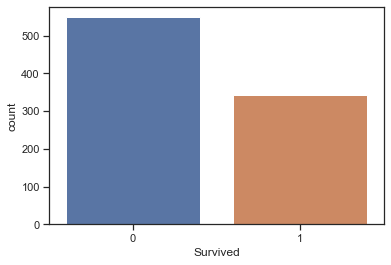

In [39]:
#plotting all the survived passenger from the whole datset
sns.countplot(x="Survived", data=df)

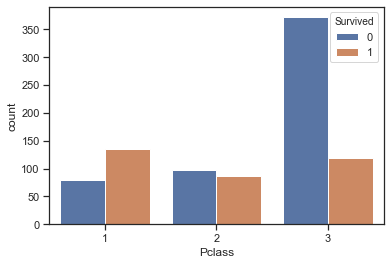

In [38]:
# plotting all the pclass on the basis of survived
sns.countplot(x="Pclass", hue="Survived", data=df)

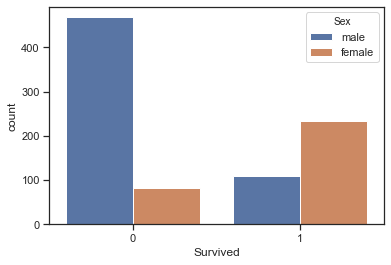

In [41]:
#plotting the graph of the survived on the basis of sex
sns.countplot(x="Survived",hue="Sex" ,data=df)

# 3. Separate this distribution now also by Gender (sns.catplot). Experiment with kind and hue arguments


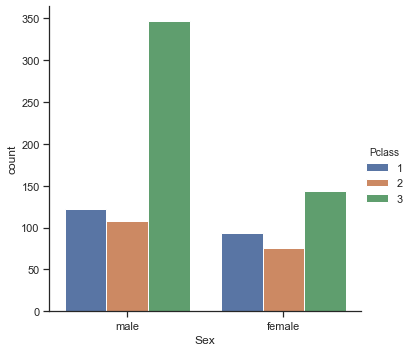

In [44]:
sns.catplot(x="Sex",hue='Pclass' ,kind="count", data=df)

#	4. Plot SibSp vs Survived per gender and Pclass using sns.catplot


In [21]:
survived_sib_class = pd.crosstab(df["SibSp"], 
                            df["Parch"], margins=True) 
survived_sib_class

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


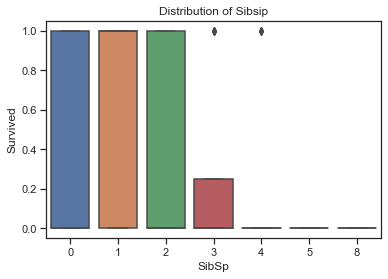

In [22]:

sns.boxplot('SibSp','Survived',data=df)
plt.title('Distribution of Sibsip')
plt.show()

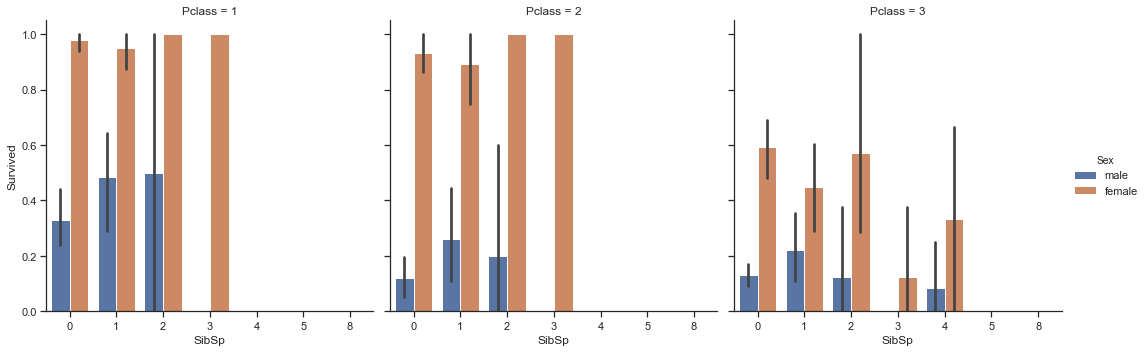

In [23]:
# Plot SibSp vs Survived per gender and Pclass using sns.catplot
sns.catplot(x="SibSp", y="Survived", hue="Sex",col="Pclass", data=df, kind='bar')

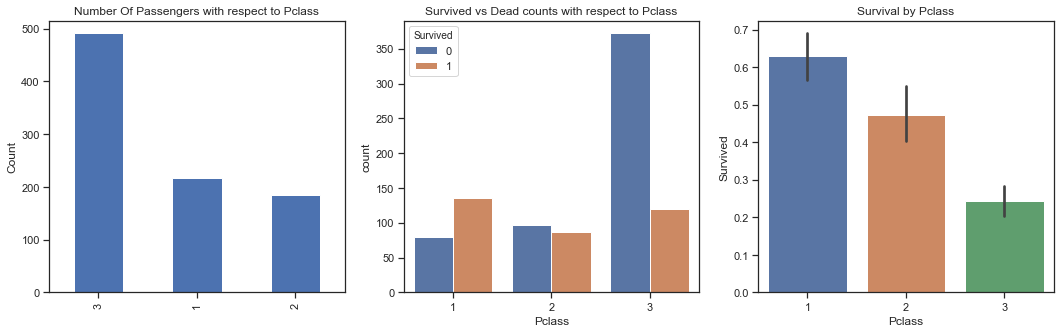

In [47]:
#features per Pclass
f,ax=plt.subplots(1,3,figsize=(18,5))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
sns.barplot(x="Pclass", y="Survived", data=df,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()

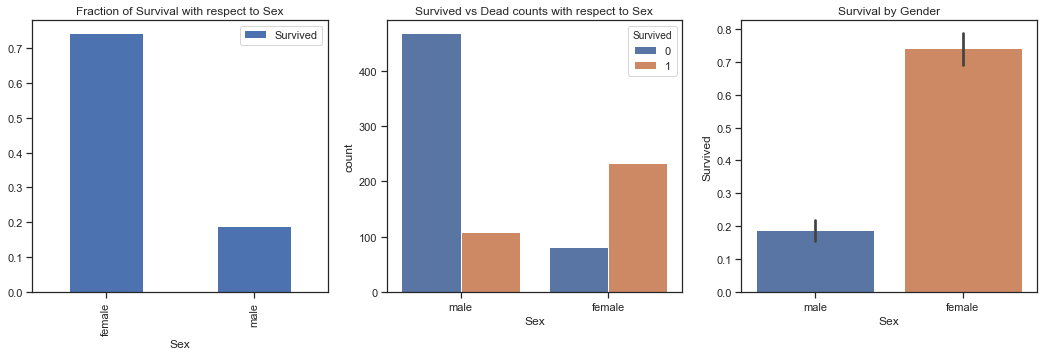

In [25]:
# feature per Gender
f,ax=plt.subplots(1,3,figsize=(18,5))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
sns.barplot(x="Sex", y="Survived", data=df,ax=ax[2])
ax[2].set_title('Survival by Gender')
plt.show()

#	5. Plot the distribution of fare for each Pclass, color by Survived, use sns.boxplot 


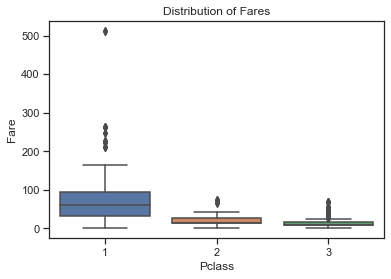

In [43]:
# drawing outlayers by grouping all values and amking max,min , mean and median value by making outlayer 
sns.boxplot('Pclass','Fare',data=df)
plt.title('Distribution of Fares')
plt.show()